In [6]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import json
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [32]:
featureDF = pd.read_pickle('../data/test_all_features_norm_and_transform.pkl').append(pd.read_pickle('../data/train_all_features_norm_and_transform.pkl'))
responseDF = pd.read_pickle('../data/housing_rental_ratio.pkl')[['RegionName','ratio_2011','ratio_2015']]

In [33]:
featureDF['zipcode'] = featureDF['zipcode'].astype(str)
responseDF['RegionName'] = responseDF['RegionName'].astype(str)
responseDF = responseDF.rename(columns={'RegionName':'zipcode'})
merged = featureDF.merge(responseDF, on='zipcode')

In [36]:
responses = merged['ratio_2015'].tolist()
merged = merged.drop(['zipcode','ratio_2015'],1)
features = merged.columns

In [37]:
import json
with open('../data/feature_encoding.json') as data_file:
    feature_encoding = json.loads(data_file.read())

for feature in feature_encoding :
    text = feature_encoding[feature].split(' - ')[-2:]
    if len(text[1]) < 15 :
        feature_encoding[feature] = text[0] + ': '+ text[1]
    else :
        feature_encoding[feature] = text[1]

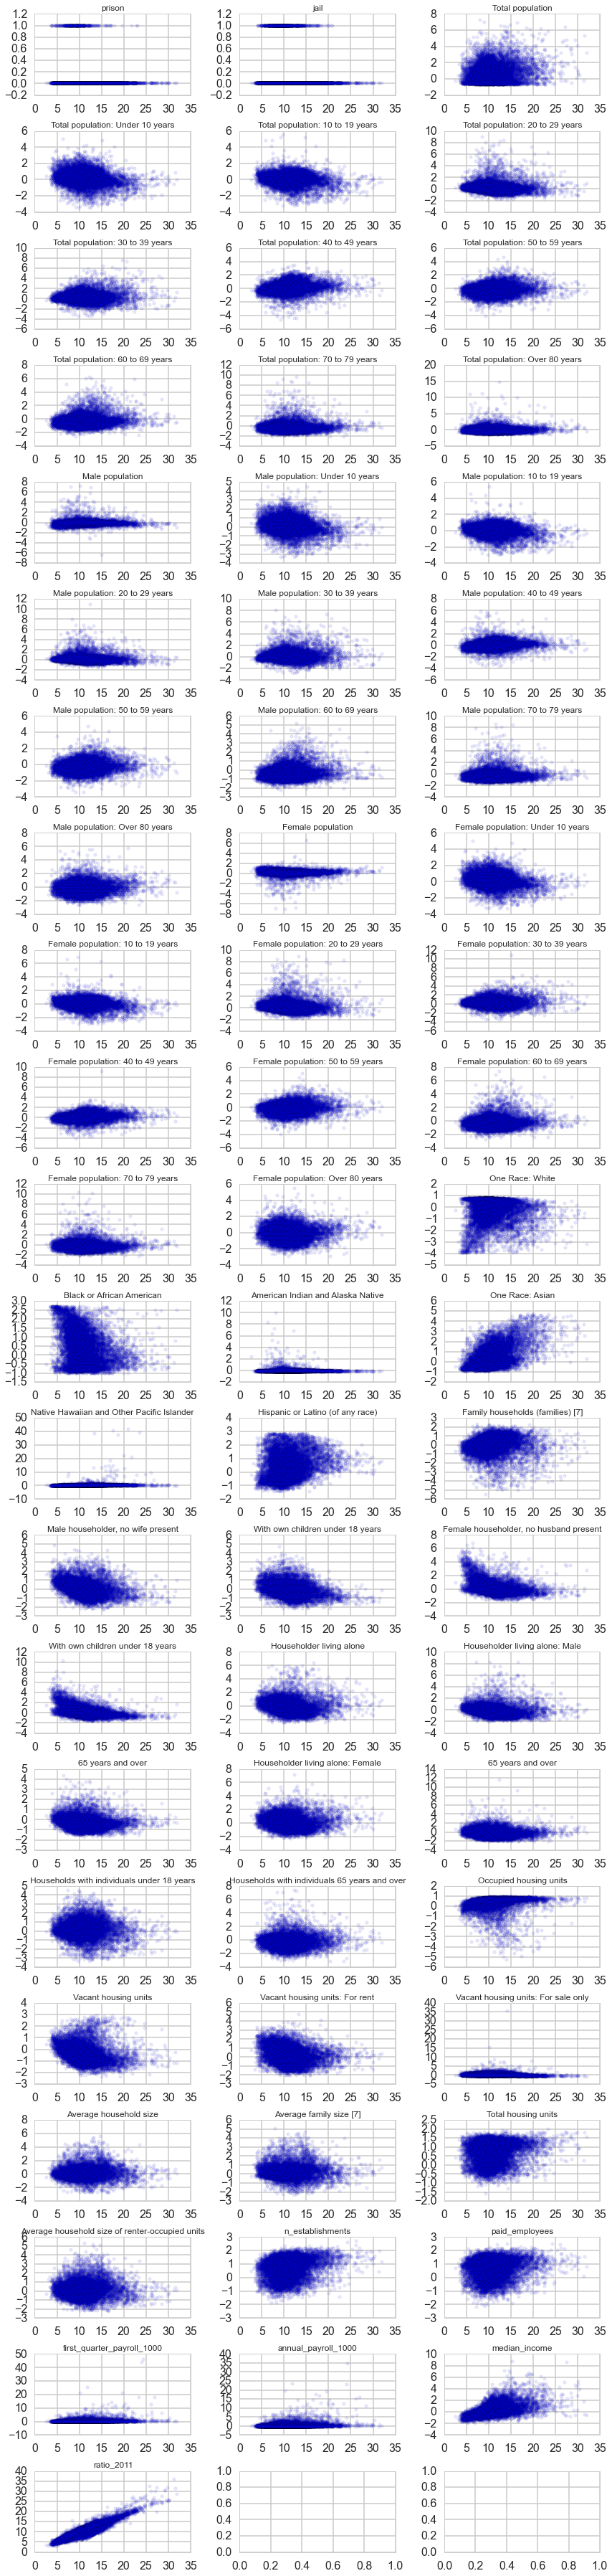

In [39]:
if len(features)%3 == 0 :
    nROW = len(features)/3
else :
    nROW = np.ceil(len(features)/3.).astype(int)
nCOL = 3

fig, axes = plt.subplots(nrows=nROW, ncols=nCOL, figsize=(12, 50), tight_layout=True)

for ax, feature in zip(axes.ravel(), features) :
    ax.scatter(responses, merged[feature].tolist(), alpha=0.1)
    if feature in feature_encoding.keys() :
        plotTitle = feature_encoding[feature] 
    else :
        plotTitle = feature
    ax.set_title(plotTitle, fontsize=12)